# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [2]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### Decision Tree

In [3]:
dt = DecisionTreeClassifier(
    random_state=RANDOM_STATE
)

In [4]:
param_distributions_dt = {
    'max_depth': [1, 2, 5, 10, 50, 100],
    'min_samples_split': [2, 3, 5, 7, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 3, 5, 7, 20, 50, 100] 
}

In [5]:
df_dt, model_dt, params_dt = runner.search_params(
    model=dt,
    params=param_distributions_dt,
    X_train=X_train,
    Y_train=Y_train,
    max_combinations=100
)

Num combinações de hiperparâmetros: 100
Iniciando busca por hiperparâmetros...
Melhor conjunto de hiperparâmetros encontrado: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50}
Tempo de busca: 3.73s


Cross-Validation (5-folds): 100%|██████████| 5/5 [00:00<00:00,  6.38it/s]


In [6]:
df_dt

,K_,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
1,2,0.851897,0.981792,0.856045,0.983031,0.827607,0.979582,0.826593,0.974253,"[0.0, 0.12279929577464789, 1.0]","[0.0, 0.8265931372549019, 1.0]"
0,1,0.850447,0.981170,0.855570,0.982710,0.825818,0.979154,0.819240,0.971801,"[0.0, 0.11834579850417949, 1.0]","[0.0, 0.8192401960784313, 1.0]"
2,3,0.848960,0.979412,0.855277,0.981366,0.823933,0.977475,0.810546,0.967515,"[0.0, 0.11262648482182139, 1.0]","[0.0, 0.8105456774984672, 1.0]"
4,5,0.846313,0.982544,0.851691,0.984056,0.820909,0.980777,0.813611,0.973337,"[0.0, 0.12098548174219094, 1.0]","[0.0, 0.8136112814224402, 1.0]"
3,4,0.841855,0.981966,0.848617,0.983736,0.815485,0.980356,0.800736,0.971192,"[0.0, 0.11702595688517378, 1.0]","[0.0, 0.8007357449417535, 1.0]"


In [7]:
runner.save_model(model_dt, "decision_tree")
runner.save_results(df_dt, "decision_tree")

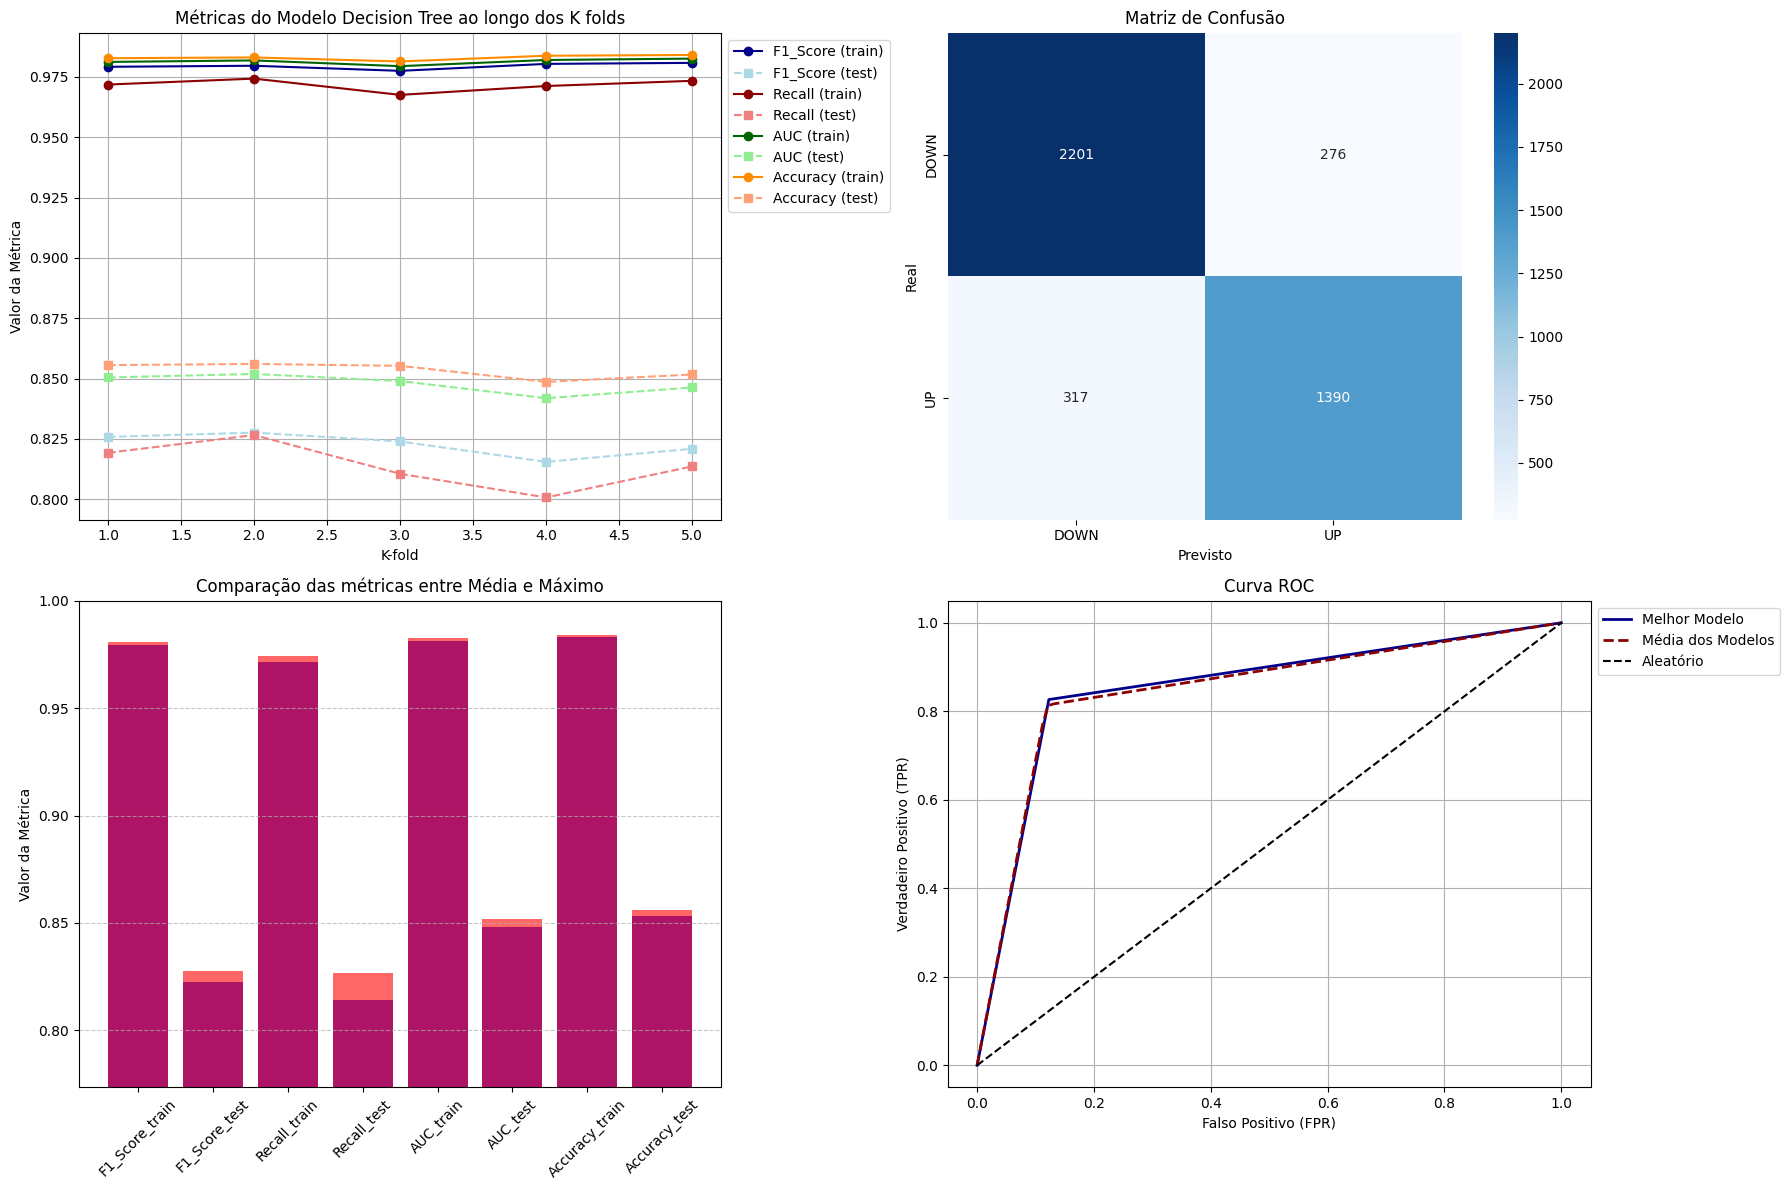

In [8]:
plots.model_evaluate(model_dt, df_dt, X_test, Y_test, model_name="Decision Tree")